In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
#import pycountry_convert as pc
#import folium
#import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
#import calmap

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
df=pd.read_csv('covid_npis_clean.csv')
df.head()

,Unnamed: 0,fip_code,county,state,npi,start_date,1/22/20,1/23/20,1/24/20,1/25/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,0,1017,Chambers,Alabama,social_distancing,4/3/20,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
1,1,1017,Chambers,Alabama,shelter_in_place,4/4/20,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
2,2,1017,Chambers,Alabama,gathering_size_500_to_101,3/13/20,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
3,3,1017,Chambers,Alabama,gathering_size_100_to_26,3/16/20,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
4,4,1017,Chambers,Alabama,gathering_size_25_to_11,3/19/20,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329


In [3]:
len(df)

2554

In [20]:
cols = df.keys()
confirmed = df.loc[:, cols[6]:cols[-1]]
confirmed.head()
d=confirmed.keys()

In [21]:
confirmed_log=confirmed.replace(0,1)
confirmed_log=np.log(confirmed_log)
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,0,0,0,0,0,0,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
1,0,0,0,0,0,0,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
2,0,0,0,0,0,0,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
3,0,0,0,0,0,0,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329
4,0,0,0,0,0,0,0,0,0,0,...,314,316,319,324,324,326,326,328,328,329


In [22]:
dates=confirmed.keys()
time = np.array([i for i in range(len(dates))]).reshape(-1, 1)

In [23]:
new_york=confirmed.iloc[1694].to_list()
new_york_log=confirmed_log.iloc[1694].to_list()


In [37]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)
model = models.Model(inputs=Visible, outputs=LRelu_l4)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)                0   

In [38]:
data_y = np.array(new_york_log)
data_x = np.arange(1,len(new_york_log)+1)
type(data_y)

numpy.ndarray

In [39]:
epochs = 1000
model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs=epochs)

Epoch 1/1000
118/118 [==============================] - 1s 5ms/step - loss: 7.6856 - accuracy: 0.0339
Epoch 2/1000
118/118 [==============================] - 0s 516us/step - loss: 7.5467 - accuracy: 0.0424
Epoch 3/1000
118/118 [==============================] - 0s 522us/step - loss: 7.7840 - accuracy: 0.0339
Epoch 4/1000
118/118 [==============================] - 0s 516us/step - loss: 7.1697 - accuracy: 0.0508
Epoch 5/1000
118/118 [==============================] - 0s 715us/step - loss: 5.3433 - accuracy: 0.0339
Epoch 6/1000
118/118 [==============================] - 0s 500us/step - loss: 5.7756 - accuracy: 0.0424
Epoch 7/1000
118/118 [==============================] - 0s 494us/step - loss: 5.3138 - accuracy: 0.0424
Epoch 8/1000
118/118 [==============================] - 0s 517us/step - loss: 5.2876 - accuracy: 0.0424
Epoch 9/1000
118/118 [==============================] - 0s 689us/step - loss: 4.7726 - accuracy: 0.0424
Epoch 10/1000
118/118 [==============================] - 0s 560us/

118/118 [==============================] - 0s 754us/step - loss: 3.5411 - accuracy: 0.1356
Epoch 80/1000
118/118 [==============================] - 0s 763us/step - loss: 3.4229 - accuracy: 0.1271
Epoch 81/1000
118/118 [==============================] - 0s 455us/step - loss: 3.4785 - accuracy: 0.1271
Epoch 82/1000
118/118 [==============================] - 0s 273us/step - loss: 3.6745 - accuracy: 0.1441
Epoch 83/1000
118/118 [==============================] - 0s 428us/step - loss: 3.5900 - accuracy: 0.1186
Epoch 84/1000
118/118 [==============================] - 0s 356us/step - loss: 3.6506 - accuracy: 0.1271
Epoch 85/1000
118/118 [==============================] - 0s 458us/step - loss: 3.3962 - accuracy: 0.1186
Epoch 86/1000
118/118 [==============================] - 0s 474us/step - loss: 3.4982 - accuracy: 0.1356
Epoch 87/1000
118/118 [==============================] - 0s 559us/step - loss: 3.4706 - accuracy: 0.1271
Epoch 88/1000
118/118 [==============================] - 0s 429us/ste

118/118 [==============================] - 0s 753us/step - loss: 3.0754 - accuracy: 0.1102
Epoch 157/1000
118/118 [==============================] - 0s 623us/step - loss: 2.9622 - accuracy: 0.1186
Epoch 158/1000
118/118 [==============================] - 0s 267us/step - loss: 3.1510 - accuracy: 0.1186
Epoch 159/1000
118/118 [==============================] - 0s 316us/step - loss: 2.9607 - accuracy: 0.1186
Epoch 160/1000
118/118 [==============================] - 0s 523us/step - loss: 3.4112 - accuracy: 0.1102
Epoch 161/1000
118/118 [==============================] - 0s 417us/step - loss: 3.1098 - accuracy: 0.1271
Epoch 162/1000
118/118 [==============================] - 0s 313us/step - loss: 2.9830 - accuracy: 0.1102
Epoch 163/1000
118/118 [==============================] - 0s 301us/step - loss: 3.0423 - accuracy: 0.1271
Epoch 164/1000
118/118 [==============================] - 0s 284us/step - loss: 2.9328 - accuracy: 0.1102
Epoch 165/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 502us/step - loss: 2.6883 - accuracy: 0.1864
Epoch 234/1000
118/118 [==============================] - 0s 324us/step - loss: 2.5920 - accuracy: 0.1610
Epoch 235/1000
118/118 [==============================] - 0s 313us/step - loss: 2.5647 - accuracy: 0.1864
Epoch 236/1000
118/118 [==============================] - 0s 429us/step - loss: 2.5607 - accuracy: 0.1780
Epoch 237/1000
118/118 [==============================] - 0s 265us/step - loss: 2.5547 - accuracy: 0.1864
Epoch 238/1000
118/118 [==============================] - 0s 311us/step - loss: 2.5130 - accuracy: 0.1780
Epoch 239/1000
118/118 [==============================] - 0s 434us/step - loss: 2.5281 - accuracy: 0.1864
Epoch 240/1000
118/118 [==============================] - 0s 562us/step - loss: 2.4301 - accuracy: 0.1695
Epoch 241/1000
118/118 [==============================] - 0s 496us/step - loss: 2.4419 - accuracy: 0.1780
Epoch 242/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 458us/step - loss: 1.8738 - accuracy: 0.3220
Epoch 311/1000
118/118 [==============================] - 0s 260us/step - loss: 1.1772 - accuracy: 0.3051
Epoch 312/1000
118/118 [==============================] - 0s 384us/step - loss: 1.1413 - accuracy: 0.2966
Epoch 313/1000
118/118 [==============================] - 0s 538us/step - loss: 1.2651 - accuracy: 0.3136
Epoch 314/1000
118/118 [==============================] - 0s 652us/step - loss: 1.1636 - accuracy: 0.2966
Epoch 315/1000
118/118 [==============================] - 0s 539us/step - loss: 1.2308 - accuracy: 0.3051
Epoch 316/1000
118/118 [==============================] - 0s 334us/step - loss: 0.9363 - accuracy: 0.3136
Epoch 317/1000
118/118 [==============================] - 0s 401us/step - loss: 0.9278 - accuracy: 0.3051
Epoch 318/1000
118/118 [==============================] - 0s 420us/step - loss: 0.8267 - accuracy: 0.3051
Epoch 319/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 225us/step - loss: 0.0543 - accuracy: 0.3475
Epoch 388/1000
118/118 [==============================] - 0s 279us/step - loss: 0.0670 - accuracy: 0.3559
Epoch 389/1000
118/118 [==============================] - 0s 239us/step - loss: 0.0899 - accuracy: 0.3475
Epoch 390/1000
118/118 [==============================] - 0s 246us/step - loss: 0.1332 - accuracy: 0.3559
Epoch 391/1000
118/118 [==============================] - 0s 205us/step - loss: 0.0846 - accuracy: 0.3559
Epoch 392/1000
118/118 [==============================] - 0s 261us/step - loss: 0.0616 - accuracy: 0.3475
Epoch 393/1000
118/118 [==============================] - 0s 242us/step - loss: 0.0508 - accuracy: 0.3559
Epoch 394/1000
118/118 [==============================] - 0s 224us/step - loss: 0.0670 - accuracy: 0.3475
Epoch 395/1000
118/118 [==============================] - 0s 264us/step - loss: 0.0633 - accuracy: 0.3559
Epoch 396/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 405us/step - loss: 0.1749 - accuracy: 0.3644
Epoch 465/1000
118/118 [==============================] - 0s 480us/step - loss: 0.2049 - accuracy: 0.3475
Epoch 466/1000
118/118 [==============================] - 0s 402us/step - loss: 0.0903 - accuracy: 0.3559
Epoch 467/1000
118/118 [==============================] - 0s 290us/step - loss: 0.0506 - accuracy: 0.3559
Epoch 468/1000
118/118 [==============================] - 0s 471us/step - loss: 0.0577 - accuracy: 0.3559
Epoch 469/1000
118/118 [==============================] - 0s 422us/step - loss: 0.0396 - accuracy: 0.3559
Epoch 470/1000
118/118 [==============================] - 0s 507us/step - loss: 0.0344 - accuracy: 0.3559
Epoch 471/1000
118/118 [==============================] - 0s 359us/step - loss: 0.0271 - accuracy: 0.3559
Epoch 472/1000
118/118 [==============================] - 0s 411us/step - loss: 0.0356 - accuracy: 0.3644
Epoch 473/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 242us/step - loss: 0.0744 - accuracy: 0.3475
Epoch 542/1000
118/118 [==============================] - 0s 385us/step - loss: 0.0605 - accuracy: 0.3644
Epoch 543/1000
118/118 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.31 - 0s 322us/step - loss: 0.0507 - accuracy: 0.3559
Epoch 544/1000
118/118 [==============================] - 0s 451us/step - loss: 0.0610 - accuracy: 0.3644
Epoch 545/1000
118/118 [==============================] - 0s 477us/step - loss: 0.0880 - accuracy: 0.3475
Epoch 546/1000
118/118 [==============================] - 0s 313us/step - loss: 0.0849 - accuracy: 0.3644
Epoch 547/1000
118/118 [==============================] - 0s 424us/step - loss: 0.0681 - accuracy: 0.3559
Epoch 548/1000
118/118 [==============================] - 0s 533us/step - loss: 0.0617 - accuracy: 0.3559
Epoch 549/1000
118/118 [==============================] - 0s 298us/step - loss: 0.0322 - accuracy: 0.3559
Epoch 550/1000
118/

Epoch 618/1000
118/118 [==============================] - 0s 249us/step - loss: 0.0312 - accuracy: 0.3559
Epoch 619/1000
118/118 [==============================] - 0s 335us/step - loss: 0.0337 - accuracy: 0.3644
Epoch 620/1000
118/118 [==============================] - 0s 452us/step - loss: 0.0454 - accuracy: 0.3559
Epoch 621/1000
118/118 [==============================] - 0s 219us/step - loss: 0.0415 - accuracy: 0.3559
Epoch 622/1000
118/118 [==============================] - 0s 429us/step - loss: 0.0263 - accuracy: 0.3644
Epoch 623/1000
118/118 [==============================] - 0s 255us/step - loss: 0.0400 - accuracy: 0.3559
Epoch 624/1000
118/118 [==============================] - 0s 344us/step - loss: 0.0355 - accuracy: 0.3559
Epoch 625/1000
118/118 [==============================] - 0s 274us/step - loss: 0.0360 - accuracy: 0.3559
Epoch 626/1000
118/118 [==============================] - 0s 198us/step - loss: 0.0300 - accuracy: 0.3644
Epoch 627/1000
118/118 [======================

118/118 [==============================] - 0s 510us/step - loss: 0.0187 - accuracy: 0.3559
Epoch 695/1000
118/118 [==============================] - 0s 475us/step - loss: 0.0184 - accuracy: 0.3559
Epoch 696/1000
118/118 [==============================] - 0s 441us/step - loss: 0.0225 - accuracy: 0.3559
Epoch 697/1000
118/118 [==============================] - 0s 384us/step - loss: 0.0206 - accuracy: 0.3559
Epoch 698/1000
118/118 [==============================] - 0s 321us/step - loss: 0.0217 - accuracy: 0.3559
Epoch 699/1000
118/118 [==============================] - 0s 377us/step - loss: 0.0284 - accuracy: 0.3559
Epoch 700/1000
118/118 [==============================] - 0s 529us/step - loss: 0.0209 - accuracy: 0.3559
Epoch 701/1000
118/118 [==============================] - 0s 446us/step - loss: 0.0201 - accuracy: 0.3559
Epoch 702/1000
118/118 [==============================] - 0s 241us/step - loss: 0.0253 - accuracy: 0.3644
Epoch 703/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 453us/step - loss: 0.0359 - accuracy: 0.3559
Epoch 772/1000
118/118 [==============================] - 0s 174us/step - loss: 0.0308 - accuracy: 0.3644
Epoch 773/1000
118/118 [==============================] - 0s 346us/step - loss: 0.0328 - accuracy: 0.3559
Epoch 774/1000
118/118 [==============================] - 0s 452us/step - loss: 0.0453 - accuracy: 0.3644
Epoch 775/1000
118/118 [==============================] - 0s 274us/step - loss: 0.0294 - accuracy: 0.3559
Epoch 776/1000
118/118 [==============================] - 0s 329us/step - loss: 0.0366 - accuracy: 0.3644
Epoch 777/1000
118/118 [==============================] - 0s 331us/step - loss: 0.0186 - accuracy: 0.3559
Epoch 778/1000
118/118 [==============================] - 0s 481us/step - loss: 0.0188 - accuracy: 0.3559
Epoch 779/1000
118/118 [==============================] - 0s 348us/step - loss: 0.0162 - accuracy: 0.3559
Epoch 780/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 241us/step - loss: 0.0321 - accuracy: 0.3559
Epoch 849/1000
118/118 [==============================] - 0s 479us/step - loss: 0.0361 - accuracy: 0.3644
Epoch 850/1000
118/118 [==============================] - 0s 357us/step - loss: 0.0403 - accuracy: 0.3644
Epoch 851/1000
118/118 [==============================] - 0s 355us/step - loss: 0.0301 - accuracy: 0.3559
Epoch 852/1000
118/118 [==============================] - 0s 362us/step - loss: 0.0206 - accuracy: 0.3559
Epoch 853/1000
118/118 [==============================] - 0s 351us/step - loss: 0.0175 - accuracy: 0.3559
Epoch 854/1000
118/118 [==============================] - 0s 627us/step - loss: 0.0313 - accuracy: 0.3559
Epoch 855/1000
118/118 [==============================] - 0s 708us/step - loss: 0.0239 - accuracy: 0.3559
Epoch 856/1000
118/118 [==============================] - 0s 397us/step - loss: 0.0221 - accuracy: 0.3644
Epoch 857/1000
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 482us/step - loss: 0.0302 - accuracy: 0.3559
Epoch 926/1000
118/118 [==============================] - 0s 413us/step - loss: 0.0557 - accuracy: 0.3644
Epoch 927/1000
118/118 [==============================] - 0s 437us/step - loss: 0.0716 - accuracy: 0.3559
Epoch 928/1000
118/118 [==============================] - 0s 339us/step - loss: 0.0391 - accuracy: 0.3559
Epoch 929/1000
118/118 [==============================] - 0s 294us/step - loss: 0.0213 - accuracy: 0.3559
Epoch 930/1000
118/118 [==============================] - 0s 393us/step - loss: 0.0189 - accuracy: 0.3559
Epoch 931/1000
118/118 [==============================] - 0s 335us/step - loss: 0.0180 - accuracy: 0.3559
Epoch 932/1000
118/118 [==============================] - 0s 279us/step - loss: 0.0278 - accuracy: 0.3559
Epoch 933/1000
118/118 [==============================] - 0s 426us/step - loss: 0.0188 - accuracy: 0.3559
Epoch 934/1000
118/118 [==============================] - 0s 

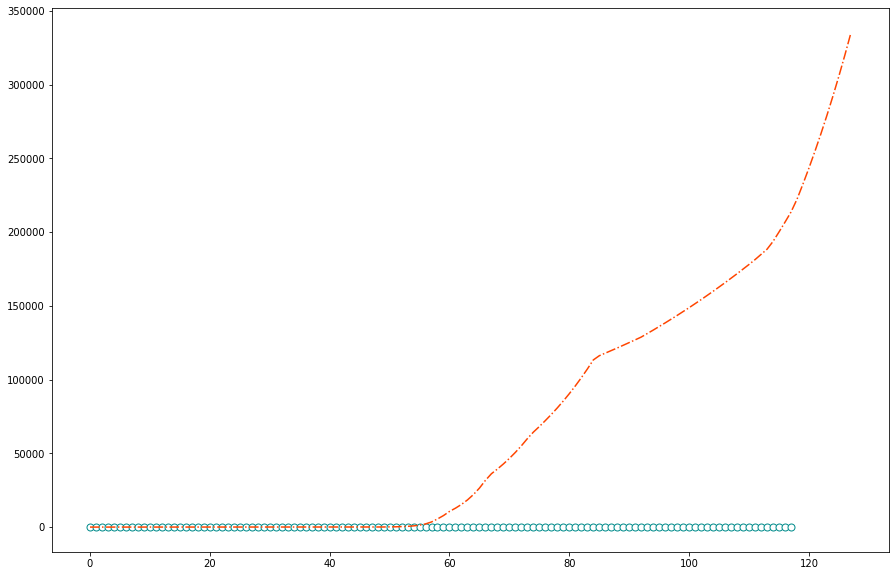

In [44]:
lakh = 100000
prediction_days = 10

temp_data =np.array(new_york_log)
data = np.exp(model.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,new_york_log,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data,"-.",color="orangered",label="Predicted Curve")

#nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
#total = d + nextdays


In [45]:
ls=[new_york, new_york_log]
data=pd.DataFrame(ls)
data=data.T
data.columns=['new york actual','new york actual after log transformation']

In [46]:
data['Time']=data.index
data.head()

,new york actual,new york actual after log transformation,Time
0,0.0,0.0,0
1,0.0,0.0,1
2,0.0,0.0,2
3,0.0,0.0,3
4,0.0,0.0,4


In [47]:
X = data.Time
X = sm.add_constant(X)


In [48]:
X

,const,Time
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
...,...,...
113,1.0,113
114,1.0,114
115,1.0,115
116,1.0,116


In [49]:
mod = sm.OLS(new_york_log, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     794.9
Date:                Tue, 19 May 2020   Prob (F-statistic):           9.69e-54
Time:                        16:04:06   Log-Likelihood:                -244.40
No. Observations:                 118   AIC:                             492.8
Df Residuals:                     116   BIC:                             498.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2629      0.354     -6.388      0.0

In [146]:
np.exp(-2.2629)

0.1040483067189046

In [147]:
np.exp(0.1475)

1.1589332848297509

In [51]:
def linear_predictions(t):
    return np.exp(-2.2629 + 0.1475* t)

In [54]:
data['Predictions'] = data.Time.apply(linear_predictions)
data.tail(10)

,new york actual,new york actual after log transformation,Time,Predictions
108,183289.0,12.118819,108,8.620771e+05
109,184417.0,12.124955,109,9.990899e+05
110,185357.0,12.130039,110,1.157878e+06
111,186123.0,12.134163,111,1.341904e+06
112,187250.0,12.140200,112,1.555177e+06
113,188545.0,12.147092,113,1.802347e+06
114,190357.0,12.156657,114,2.088799e+06
115,191600.0,12.163165,115,2.420779e+06
116,192593.0,12.168334,116,2.805522e+06
117,193230.0,12.171636,117,3.251412e+06


In [ ]:
curve_fit=np.polyfit()

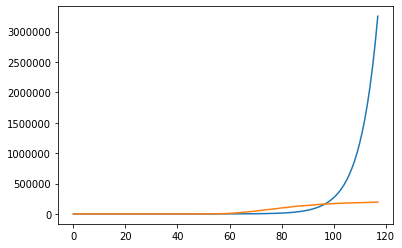

In [55]:
plt.plot(data.Predictions)
plt.plot(new_york)

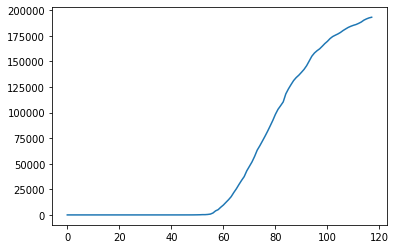

In [158]:
plt.plot(data['new york actual'])

In [14]:
df=pd.read_csv('covid_npis_dummy.csv')
df.head(20)

,Unnamed: 0,fip_code,county,state,start_date,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,npi_gathering_size_100_to_26,npi_gathering_size_10_0,npi_gathering_size_25_to_11,npi_gathering_size_500_to_101,npi_lockdown,npi_non-essential_services_closure,npi_religious_gatherings_banned,npi_school_closure,npi_shelter_in_place,npi_social_distancing
0,0,1017,Chambers,Alabama,4/3/20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1017,Chambers,Alabama,4/4/20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1017,Chambers,Alabama,3/13/20,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1017,Chambers,Alabama,3/16/20,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,1017,Chambers,Alabama,3/19/20,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,5,1017,Chambers,Alabama,3/28/20,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,6,1017,Chambers,Alabama,4/4/20,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,7,1017,Chambers,Alabama,3/20/20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,8,1017,Chambers,Alabama,3/28/20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,1017,Chambers,Alabama,3/28/20,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
len(df)

2554